In [77]:
# Import libraries
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [78]:
#read Data
hotels_df=pd.read_csv("hotel_bookings.csv")

In [79]:
#les 5 premiers lignes du data
hotels_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [80]:
#dimension du data (119390, 32)
hotels_df.shape

(119390, 32)

In [81]:
#info du data
hotels_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [82]:
#les valeurs manquantes dans chaque colonne
hotels_df.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [83]:
#le nombre total des valeurs manquantes est 129425
hotels_df.isna().sum().sum()

129425

In [84]:
#### On supprime les lignes ayant des valeurs manquantes, à l'exception des variables comme 'agent' ou 'company',
# «NULL» est présenté comme l'une des catégories.
for col in hotels_df.columns:
    if col != 'agent' and col != 'company' :
       hotels_df.dropna(subset = [col], inplace=True)

In [85]:
#on verifie que les valeurs manquantes sont supprimées dans chaque colonne
hotels_df.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               0
babies                                 0
meal                                   0
country                                0
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16004
company         

In [86]:
### On veut changer arrival year, month and day à arrival_date qui a un format 'datetime'
## On change d'abord le nom du mois en un nombre 
hotels_df['arrival_date_month'] = hotels_df['arrival_date_month'].apply(lambda month: dt.datetime.strptime(month, '%B').month)

In [87]:
hotels_df['arrival_date_month']

0         7
1         7
2         7
3         7
4         7
         ..
119385    8
119386    8
119387    8
119388    8
119389    8
Name: arrival_date_month, Length: 118898, dtype: int64

In [88]:
hotels_df.rename(columns={'arrival_date_year':'year', 'arrival_date_month':'month',
                          'arrival_date_day_of_month': 'day'}, inplace=True)

In [89]:
hotels_df['arrival_date'] = pd.to_datetime(hotels_df[['year','month','day']],format = '%Y-%m-%d')
hotels_df['arrival_date']

0        2015-07-01
1        2015-07-01
2        2015-07-01
3        2015-07-01
4        2015-07-01
            ...    
119385   2017-08-30
119386   2017-08-31
119387   2017-08-31
119388   2017-08-31
119389   2017-08-29
Name: arrival_date, Length: 118898, dtype: datetime64[ns]

In [90]:
hotels_df.drop('month',axis=1, inplace=True)
hotels_df.drop('day',axis=1, inplace=True)
hotels_df.drop('year',axis=1,  inplace=True)
hotels_df.head()

,hotel,is_canceled,lead_time,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date
0,Resort Hotel,0,342,27,0,0,2,0.0,0,BB,...,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01
1,Resort Hotel,0,737,27,0,0,2,0.0,0,BB,...,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01
2,Resort Hotel,0,7,27,0,1,1,0.0,0,BB,...,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01
3,Resort Hotel,0,13,27,0,1,1,0.0,0,BB,...,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01
4,Resort Hotel,0,14,27,0,2,2,0.0,0,BB,...,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03,2015-07-01


In [91]:
# vérifications de cohérence sur les données de date
today = dt.date.today()

In [92]:
#convertir 'reservation_status_date' a1 datetime
hotels_df['reservation_status_date']=pd.to_datetime(hotels_df['reservation_status_date'])

In [93]:
hotels_df[hotels_df['reservation_status_date'].dt.date > today]

,hotel,is_canceled,lead_time,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date


In [94]:
hotels_df[hotels_df['arrival_date'].dt.date > today]

,hotel,is_canceled,lead_time,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date


In [95]:
#Vérifiez que l'horodatage de la variable 'reservation_status_date' doit apparaître après ou à la même date que
#la variable d'entrée 'arrival_date'
hotels_df[hotels_df['arrival_date'].dt.date <= hotels_df['reservation_status_date'].dt.date]

,hotel,is_canceled,lead_time,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date
0,Resort Hotel,0,342,27,0,0,2,0.0,0,BB,...,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01,2015-07-01
1,Resort Hotel,0,737,27,0,0,2,0.0,0,BB,...,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01,2015-07-01
2,Resort Hotel,0,7,27,0,1,1,0.0,0,BB,...,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02,2015-07-01
3,Resort Hotel,0,13,27,0,1,1,0.0,0,BB,...,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02,2015-07-01
4,Resort Hotel,0,14,27,0,2,2,0.0,0,BB,...,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03,2015-07-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,35,2,5,2,0.0,0,BB,...,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06,2017-08-30
119386,City Hotel,0,102,35,2,5,3,0.0,0,BB,...,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07,2017-08-31
119387,City Hotel,0,34,35,2,5,2,0.0,0,BB,...,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07,2017-08-31
119388,City Hotel,0,109,35,2,5,2,0.0,0,BB,...,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07,2017-08-31


In [96]:
hotels_df.duplicated().sum()

31958

In [97]:
hotels_df.drop_duplicates()

,hotel,is_canceled,lead_time,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date
0,Resort Hotel,0,342,27,0,0,2,0.0,0,BB,...,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01,2015-07-01
1,Resort Hotel,0,737,27,0,0,2,0.0,0,BB,...,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01,2015-07-01
2,Resort Hotel,0,7,27,0,1,1,0.0,0,BB,...,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02,2015-07-01
3,Resort Hotel,0,13,27,0,1,1,0.0,0,BB,...,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02,2015-07-01
4,Resort Hotel,0,14,27,0,2,2,0.0,0,BB,...,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03,2015-07-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,35,2,5,2,0.0,0,BB,...,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06,2017-08-30
119386,City Hotel,0,102,35,2,5,3,0.0,0,BB,...,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07,2017-08-31
119387,City Hotel,0,34,35,2,5,2,0.0,0,BB,...,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07,2017-08-31
119388,City Hotel,0,109,35,2,5,2,0.0,0,BB,...,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07,2017-08-31


<AxesSubplot:xlabel='reservation_status_date', ylabel='count'>

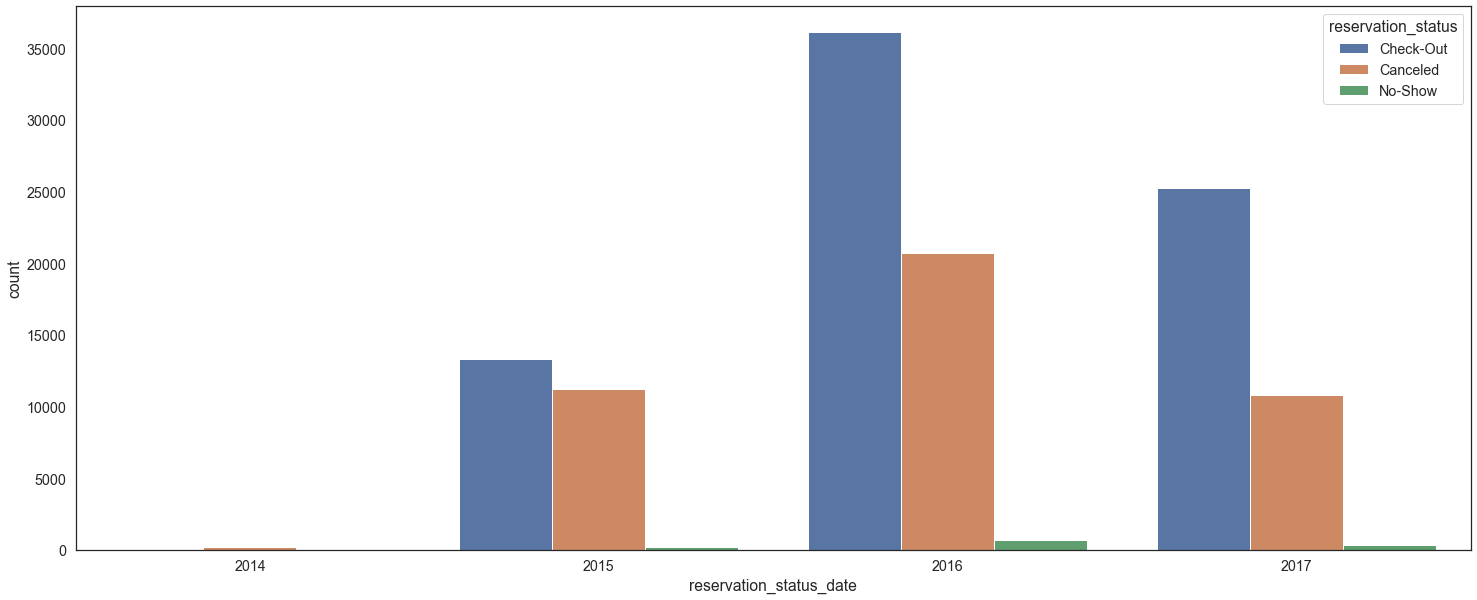

In [98]:
# Nombre de chaue type de reservation chaque année
plt.rcParams['figure.figsize'] = [25, 10]
sns.countplot(x=hotels_df['reservation_status_date'].dt.year, hue = hotels_df['reservation_status'] ,data=hotels_df)

<AxesSubplot:xlabel='arrival_date', ylabel='count'>

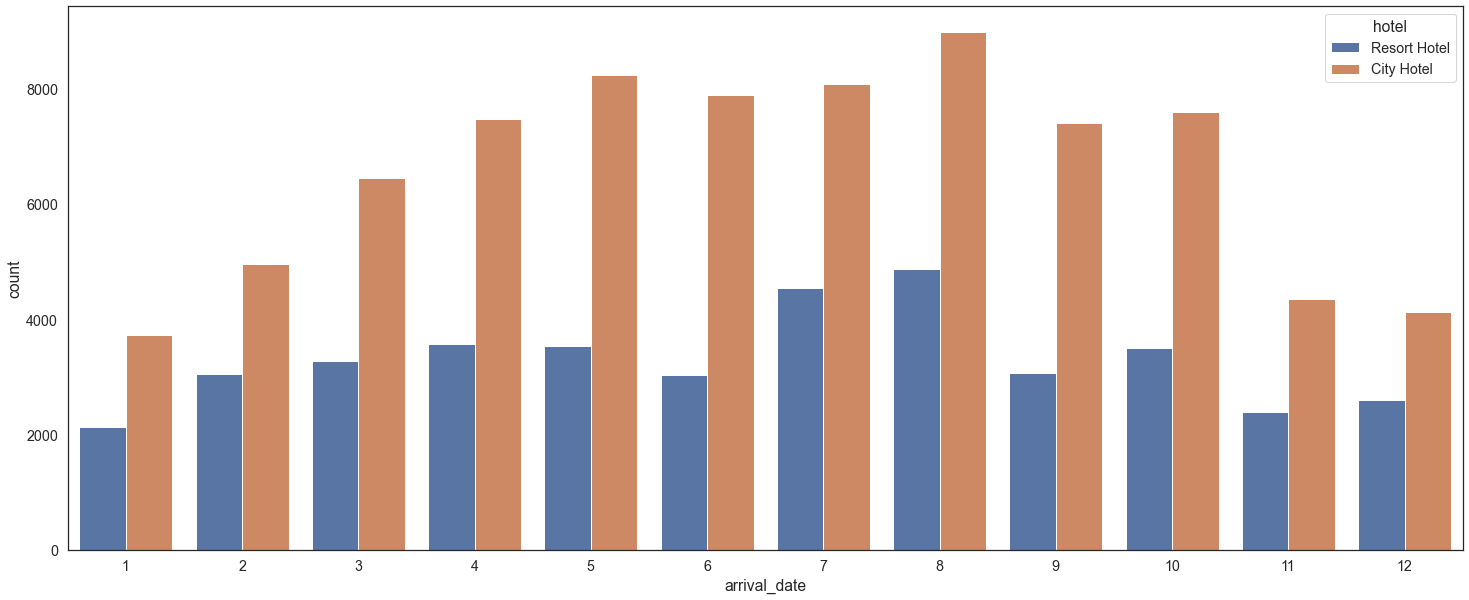

In [99]:
#Nombre de réservations par mois (dans chaque hotel)
plt.rcParams['figure.figsize'] = [25, 10]
sns.countplot(x=hotels_df['arrival_date'].dt.month, hue = hotels_df['hotel'],data=hotels_df)


In [100]:
#Création des statistiques récapitulatives de jeu de données - Date variables
hotels_df_date = hotels_df[['arrival_date', 'reservation_status_date']]

In [101]:
hotels_df_date.describe()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


,arrival_date,reservation_status_date
count,118898,118898
unique,793,926
top,2015-12-05 00:00:00,2015-10-21 00:00:00
freq,448,1461
first,2015-07-01 00:00:00,2014-10-17 00:00:00
last,2017-08-31 00:00:00,2017-09-14 00:00:00


In [102]:
# les valeurs null dans les variables 'agent' et 'company' sont mise à 0
hotels_df.loc[hotels_df.agent.isnull(), 'agent'] = 0
hotels_df.loc[hotels_df.company.isnull(), 'company'] = 0

In [103]:
#Créetion des statistiques récapitulatives de jeu de données - Categorical variables
hotels_df_categories = hotels_df[['hotel','is_canceled','meal','country','market_segment','distribution_channel',
                                  'is_repeated_guest','reserved_room_type','assigned_room_type','deposit_type',
                                  'company','agent','customer_type', 'reservation_status']]

In [104]:
hotels_df_categories.describe()

,is_canceled,is_repeated_guest,company,agent
count,118898.000000,118898.000000,118898.000000,118898.000000
mean,0.371352,0.032011,10.562709,74.896264
std,0.483168,0.176029,53.513170,107.145761
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,7.000000
50%,0.000000,0.000000,0.000000,9.000000
75%,1.000000,0.000000,0.000000,152.000000
max,1.000000,1.000000,543.000000,535.000000


In [105]:
hotels_df_categories.corr()

,is_canceled,is_repeated_guest,company,agent
is_canceled,1.000000,-0.085179,-0.082306,-0.046543
is_repeated_guest,-0.085179,1.000000,0.162036,-0.052489
company,-0.082306,0.162036,1.000000,-0.119788
agent,-0.046543,-0.052489,-0.119788,1.000000


<AxesSubplot:xlabel='customer_type', ylabel='count'>

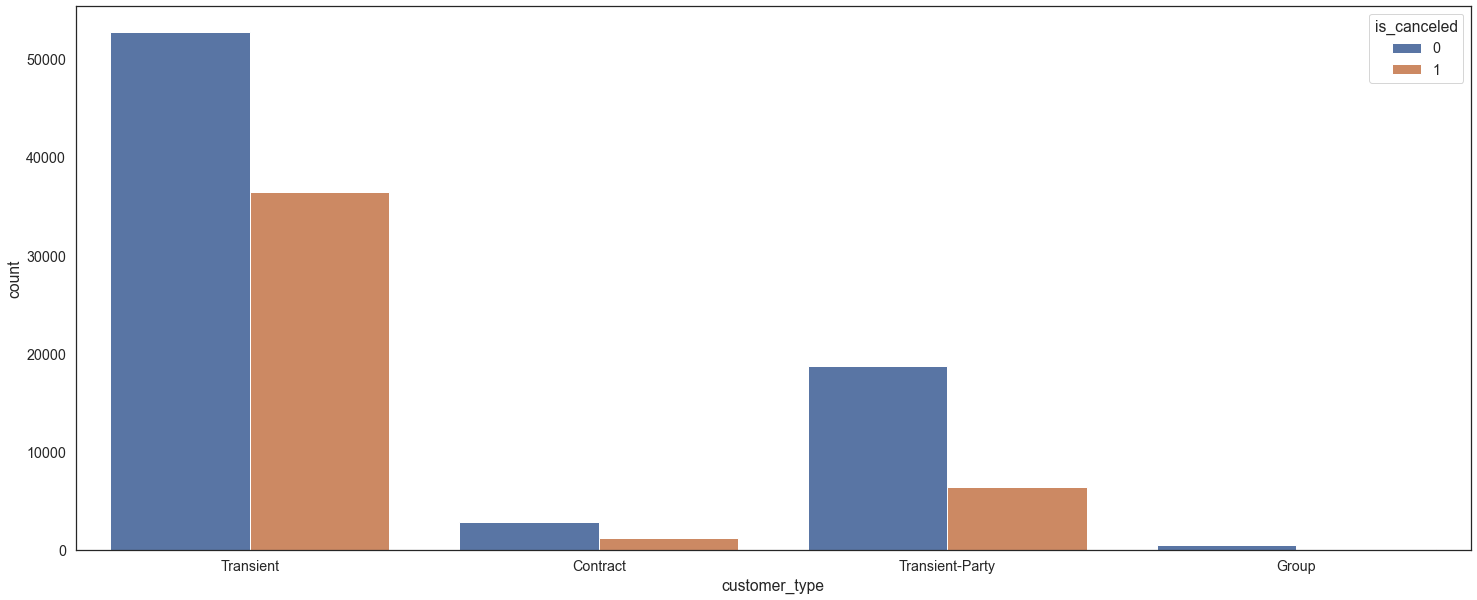

In [106]:
#visualisation de le variable is_canceled selon chaque type des consommateurs 
sns.countplot(x=hotels_df_categories['customer_type'], hue=hotels_df_categories['is_canceled'],
              data=hotels_df_categories)

<AxesSubplot:xlabel='meal', ylabel='count'>

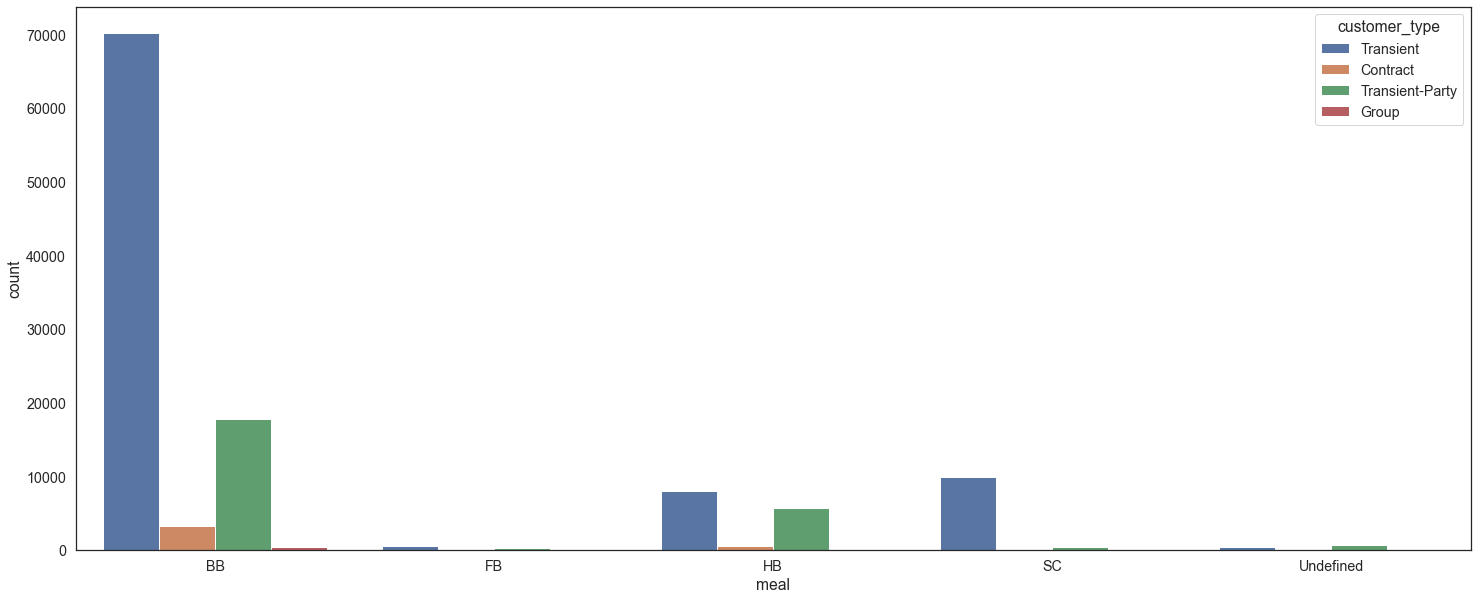

In [107]:
sns.countplot(x=hotels_df_categories['meal'], hue=hotels_df_categories['customer_type'],
              data=hotels_df_categories)

In [108]:
#Création des statistiques récapitulatives de jeu de données - Integer and numeric variables
hotels_df_numeric = hotels_df[['lead_time','stays_in_weekend_nights','stays_in_week_nights','adults','children',
                              'babies','previous_cancellations','previous_bookings_not_canceled','booking_changes',
                              'days_in_waiting_list','adr','required_car_parking_spaces',
                               'total_of_special_requests']]


In [109]:
hotels_df_numeric.describe()

,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000
mean,104.311435,0.928897,2.502145,1.858391,0.104207,0.007948,0.087142,0.131634,0.221181,2.330754,102.003243,0.061885,0.571683
std,106.903309,0.996216,1.900168,0.578576,0.399172,0.097380,0.845869,1.484672,0.652785,17.630452,50.485862,0.244172,0.792678
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,18.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000
50%,69.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000
75%,161.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,737.000000,16.000000,41.000000,55.000000,10.000000,10.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000


In [110]:
hotels_df_numeric.corr()

,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
lead_time,1.000000,0.083984,0.164783,0.116799,-0.038335,-0.021149,0.085961,-0.071128,0.000004,0.170007,-0.066381,-0.115561,-0.096536
stays_in_weekend_nights,0.083984,1.000000,0.494888,0.090410,0.045430,0.018396,-0.013008,-0.040597,0.062401,-0.054568,0.047300,-0.018147,0.071669
stays_in_week_nights,0.164783,0.494888,1.000000,0.091999,0.044259,0.020157,-0.014274,-0.047367,0.095665,-0.002161,0.063628,-0.024378,0.066785
adults,0.116799,0.090410,0.091999,1.000000,0.029590,0.017887,-0.006974,-0.105028,-0.052420,-0.008765,0.227480,0.016370,0.121815
children,-0.038335,0.045430,0.044259,0.029590,1.000000,0.024131,-0.024752,-0.020364,0.048660,-0.033396,0.325034,0.057060,0.081786
babies,-0.021149,0.018396,0.020157,0.017887,0.024131,1.000000,-0.007489,-0.006306,0.083220,-0.010648,0.028591,0.036971,0.097601
previous_cancellations,0.085961,-0.013008,-0.014274,-0.006974,-0.024752,-0.007489,1.000000,0.154285,-0.027092,0.005927,-0.065930,-0.018455,-0.048585
previous_bookings_not_canceled,-0.071128,-0.040597,-0.047367,-0.105028,-0.020364,-0.006306,0.154285,1.000000,0.011970,-0.009011,-0.069638,0.046945,0.037595
booking_changes,0.000004,0.062401,0.095665,-0.052420,0.048660,0.083220,-0.027092,0.011970,1.000000,-0.011661,0.019201,0.065724,0.052434
days_in_waiting_list,0.170007,-0.054568,-0.002161,-0.008765,-0.033396,-0.010648,0.005927,-0.009011,-0.011661,1.000000,-0.041333,-0.030462,-0.082970


(-50.0, 500.0)

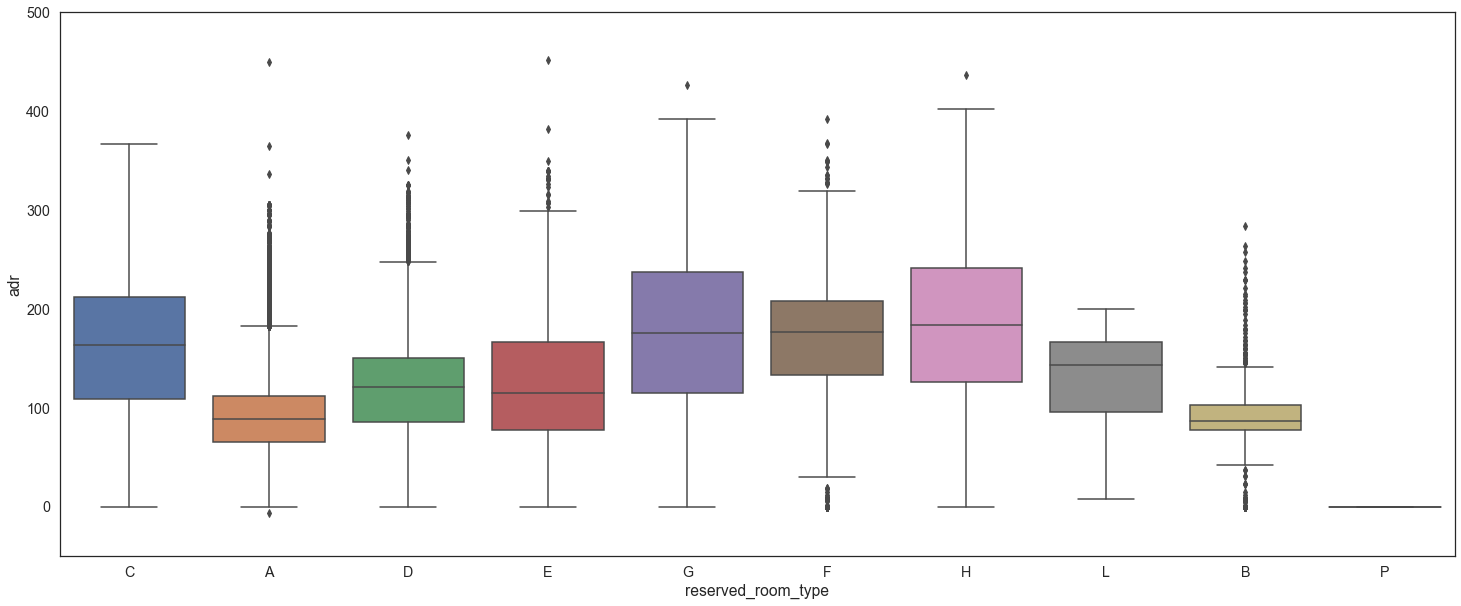

In [111]:
sns.boxplot(x = 'reserved_room_type', y = 'adr', data = hotels_df)
plt.ylim(-50, 500)

<AxesSubplot:xlabel='hotel', ylabel='count'>

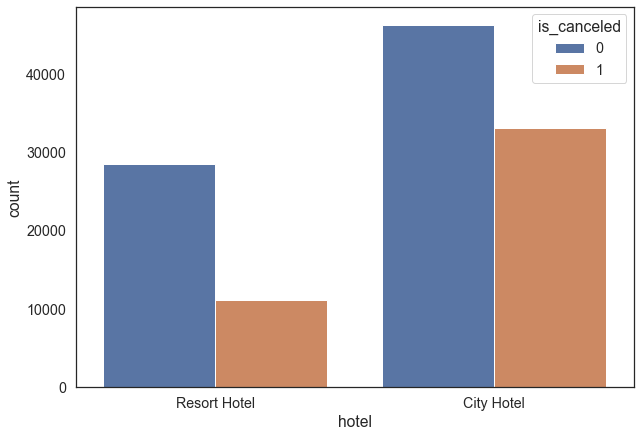

In [112]:
#Check the distribution of hotel type for cancellation
plt.rcParams['figure.figsize'] = [10, 7]
sns.set(style = 'white', font_scale = 1.3)
sns.countplot(x=hotels_df['hotel'], hue=hotels_df['is_canceled'], data =hotels_df)

In [113]:
resort_h = hotels_df[(hotels_df['hotel']=='Resort Hotel') & (hotels_df['is_canceled']== 1)].count()[1]
city_h = hotels_df[(hotels_df['hotel']=='City Hotel') & (hotels_df['is_canceled'] == 1)].count()[1]

print("le nombre d'annulation dans Resort Hotel est ", resort_h)
print("le nombre d'annulation dans City Hotel est ", city_h)

le nombre d'annulation dans Resort Hotel est  11077
le nombre d'annulation dans City Hotel est  33076


<AxesSubplot:xlabel='adults', ylabel='count'>

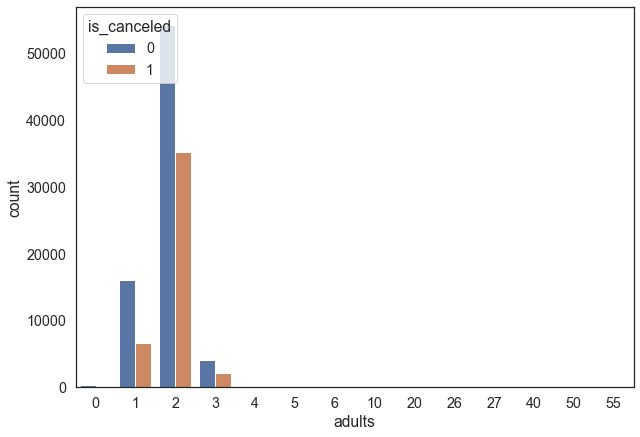

In [114]:
#Plot distribution of cancellation and Number of Adults
sns.countplot(x=hotels_df['adults'], hue= hotels_df['is_canceled'],data =hotels_df)

In [115]:
for i in hotels_df['adults'].unique():
    print("pour ",i," adulte(s), le nombre des annulations est", hotels_df[hotels_df['adults']==i].count()[1])

pour  2  adulte(s), le nombre des annulations est 89495
pour  1  adulte(s), le nombre des annulations est 22735
pour  3  adulte(s), le nombre des annulations est 6197
pour  4  adulte(s), le nombre des annulations est 62
pour  40  adulte(s), le nombre des annulations est 1
pour  26  adulte(s), le nombre des annulations est 5
pour  50  adulte(s), le nombre des annulations est 1
pour  27  adulte(s), le nombre des annulations est 2
pour  55  adulte(s), le nombre des annulations est 1
pour  0  adulte(s), le nombre des annulations est 393
pour  20  adulte(s), le nombre des annulations est 2
pour  6  adulte(s), le nombre des annulations est 1
pour  5  adulte(s), le nombre des annulations est 2
pour  10  adulte(s), le nombre des annulations est 1


## Machine Learning

In [116]:
hotels_df = hotels_df.reindex(columns=['hotel', 'lead_time', 'arrival_date_week_number',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'meal', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests','agent',
       'company','reservation_status', 'reservation_status_date', 'arrival_date','country','is_canceled'])

In [117]:
hotels_df.columns

Index(['hotel', 'lead_time', 'arrival_date_week_number',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'meal', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests', 'agent',
       'company', 'reservation_status', 'reservation_status_date',
       'arrival_date', 'country', 'is_canceled'],
      dtype='object')

In [118]:
i = 0
for col in hotels_df.columns :
    print (col, i)
    i+=1

hotel 0
lead_time 1
arrival_date_week_number 2
stays_in_weekend_nights 3
stays_in_week_nights 4
adults 5
children 6
babies 7
meal 8
market_segment 9
distribution_channel 10
is_repeated_guest 11
previous_cancellations 12
previous_bookings_not_canceled 13
reserved_room_type 14
assigned_room_type 15
booking_changes 16
deposit_type 17
days_in_waiting_list 18
customer_type 19
adr 20
required_car_parking_spaces 21
total_of_special_requests 22
agent 23
company 24
reservation_status 25
reservation_status_date 26
arrival_date 27
country 28
is_canceled 29


In [177]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0,8,9,10,14,15,17,19])], remainder='passthrough')
hotels_df_np = np.array(ct.fit_transform(hotels_df))

In [178]:
# la 5eme ligne du data
hotels_df_np[5,:]

array([0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 14, 27, 0, 2, 2, 0.0,
       0, 0, 0, 0, 0, 0, 98.0, 0, 1, 240.0, 0.0, 'Check-Out',
       Timestamp('2015-07-03 00:00:00'), Timestamp('2015-07-01 00:00:00'),
       'GBR', 0], dtype=object)

In [179]:
# On a 72 colonnes
np.shape(hotels_df_np)

(118898, 70)

In [180]:
X = hotels_df_np[:, :65]
y = hotels_df_np[:, -1]

In [181]:
X[5]

array([0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 14, 27, 0, 2, 2, 0.0,
       0, 0, 0, 0, 0, 0, 98.0, 0, 1, 240.0, 0.0], dtype=object)

In [182]:
y[5]

0

In [183]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [184]:
# split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (95118, 65) (95118,)
Test set: (23780, 65) (23780,)


In [185]:
# Standadization
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [194]:
# import
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn import metrics

## Logistic regression

In [195]:
from sklearn.linear_model import LogisticRegression
model_reg = LogisticRegression(random_state = 0, max_iter=150)
model_reg.fit(X_train, y_train)

LogisticRegression(max_iter=150, random_state=0)

In [196]:
score_reg = model_reg.score(X_test, y_test)
print("le score est", score_reg)

le score est 0.8122792262405383


In [197]:
#Measuring Accuracy Using Cross-Validation
cross_val_score(model_reg, X_train, y_train, cv=3, scoring="accuracy")

array([0.80871128, 0.8117391 , 0.81438844])

In [198]:
#Matrice de confusion
y_pred = cross_val_predict(model_reg, X_train, y_train, cv=3)
confusion_matrix(y_train,y_pred)

array([[55439,  4461],
       [13458, 21760]])

In [199]:
#Precision et Recall et F1 score
from sklearn.metrics import precision_score, recall_score, f1_score
precision_LR = precision_score(y_train, y_pred)
recall_LR = recall_score(y_train, y_pred)
f1_LR = f1_score(y_train, y_pred)
print("Precision = ", precision_LR)
print("recall = ", recall_LR)
print("F1 score = ", f1_LR)

Precision =  0.8298691888181229
recall =  0.6178658640467942
F1 score =  0.7083448623838279


In [203]:
y_pred_lr = model_reg.predict(X_test)

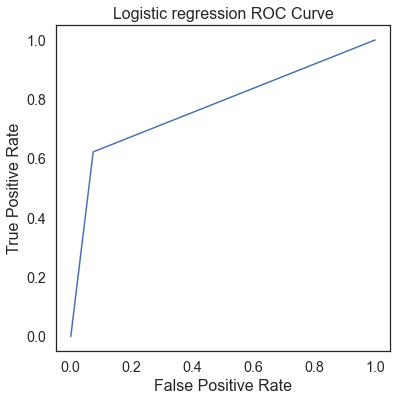

In [206]:
# construire la courbe ROC
from sklearn import metrics
fpr, tpr, thr = metrics.roc_curve(y_test, y_pred_lr)

fig = plt.figure(figsize=(6, 6))

# afficher la courbe ROC
plt.plot(fpr, tpr)

# donner un titre aux axes et au graphique
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('Logistic regression ROC Curve', fontsize=16)


# afficher l'image
plt.show()

## K nearest neighbor (KNN)

In [207]:
from sklearn.neighbors import KNeighborsClassifier
model_nei = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
model_nei.fit(X_train, y_train)

KNeighborsClassifier()

In [209]:
y_pred_knn = model_nei.predict(X_test)

In [211]:
score_nei = accuracy_score(y_test, y_pred_knn)
print("le score est", score_nei)

le score est 0.8246005046257359


In [210]:
#Measuring Accuracy Using Cross-Validation
cross_val_score(model_nei, X_train, y_train, cv=3, scoring="accuracy")

array([0.81861477, 0.81968713, 0.82463887])

In [212]:
# Matrice de confusion
y_pred = cross_val_predict(model_nei, X_train, y_train, cv=3)
confusion_matrix(y_train,y_pred)

array([[52880,  7020],
       [10008, 25210]])

In [213]:
#Precision et Recall et F1 score
precision_LR = precision_score(y_train, y_pred)
recall_LR = recall_score(y_train, y_pred)
f1_LR = f1_score(y_train, y_pred)
print("Precision = ", precision_LR)
print("recall = ", recall_LR)
print("F1 score = ", f1_LR)

Precision =  0.7821905057399938
recall =  0.7158271338520075
F1 score =  0.7475388447396514


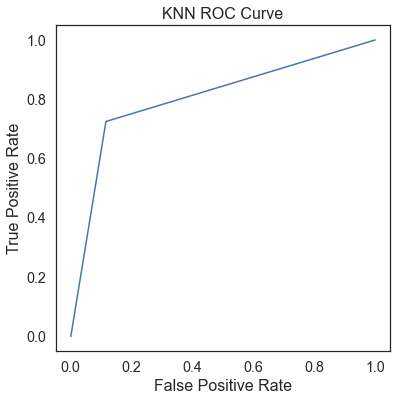

In [214]:
# construire la courbe ROC
from sklearn import metrics
fpr, tpr, thr = metrics.roc_curve(y_test, y_pred_knn)

# calculer l'aire sous la courbe ROC
auc = metrics.auc(fpr, tpr)

# créer une figure
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(6, 6))

# afficher la courbe ROC
plt.plot(fpr, tpr)

# donner un titre aux axes et au graphique
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('KNN ROC Curve', fontsize=16)


# afficher l'image
plt.show()

## SVM

In [216]:
from sklearn.svm import SVC
model_svm = SVC(C = 10, kernel = 'rbf',gamma = 0.1, random_state = 0)
model_svm.fit(X_train, y_train)

SVC(C=10, gamma=0.1, random_state=0)

In [218]:
y_pred_svm = model_svm.predict(X_test)

In [219]:
score_svm = accuracy_score(y_test, y_pred_svm)
print("le score est", score_svm)

le score est 0.8398233809924306


In [220]:
#Measuring Accuracy Using Cross-Validation
cross_val_score(model_svm, X_train, y_train, cv=3, scoring="accuracy")

array([0.83561471, 0.8368763 , 0.83741248])

In [221]:
# Matrice de confusion
y_pred = cross_val_predict(model_svm, X_train, y_train, cv=3)
confusion_matrix(y_train,y_pred)

array([[54195,  5705],
       [ 9834, 25384]])

In [222]:
#Precision et Recall et F1 score
precision_LR = precision_score(y_train, y_pred)
recall_LR = recall_score(y_train, y_pred)
f1_LR = f1_score(y_train, y_pred)
print("Precision = ", precision_LR)
print("recall = ", recall_LR)
print("F1 score = ", f1_LR)

Precision =  0.8164945800765544
recall =  0.7207677891987052
F1 score =  0.7656506854479919


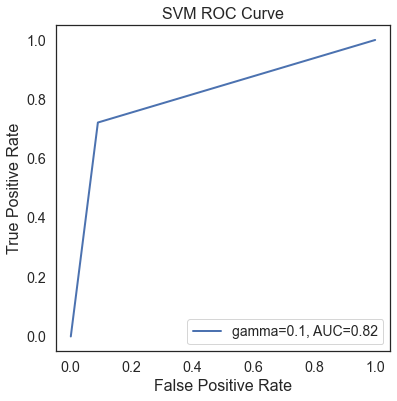

In [223]:
# construire la courbe ROC
from sklearn import metrics
fpr, tpr, thr = metrics.roc_curve(y_test, y_pred_svm)

# calculer l'aire sous la courbe ROC
auc = metrics.auc(fpr, tpr)

# créer une figure
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(6, 6))

# afficher la courbe ROC
plt.plot(fpr, tpr, '-', lw=2, label='gamma=0.1, AUC=%.2f' % auc)

# donner un titre aux axes et au graphique
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('SVM ROC Curve', fontsize=16)

# afficher la légende
plt.legend(loc="lower right", fontsize=14)

# afficher l'image
plt.show()

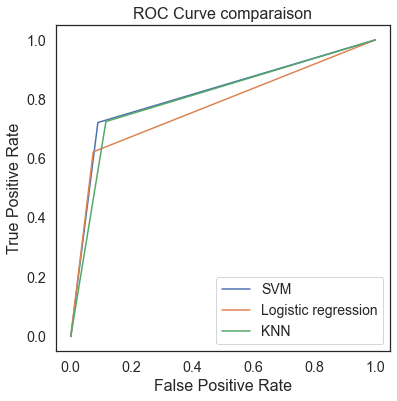

In [224]:
# construire la courbe ROC
from sklearn import metrics
fpr, tpr, thr = metrics.roc_curve(y_test, y_pred_svm)
fpr_1, tpr_1, thr_1 = metrics.roc_curve(y_test, y_pred_lr)
fpr_2, tpr_2, thr_2 = metrics.roc_curve(y_test, y_pred_knn)

fig = plt.figure(figsize=(6, 6))

# afficher la courbe ROC
plt.plot(fpr, tpr, label="SVM")
plt.plot(fpr_1, tpr_1, label="Logistic regression")
plt.plot(fpr_2, tpr_2, label="KNN")

# donner un titre aux axes et au graphique
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC Curve comparaison', fontsize=16)

# afficher la légende
plt.legend(loc="lower right", fontsize=14)

# afficher l'image
plt.show()

## Kmeans

In [281]:
from sklearn.cluster import KMeans

In [282]:
ct_1=ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[0,8,9,10,14,15,17,19,25])],remainder='passthrough')
hotels_df_np_1 = np.array(ct_1.fit_transform(hotels_df))

In [283]:
X_kmeans = hotels_df_np_1[:,:68]

In [310]:
y_kmeans = hotels_df_np_1[:, -1]

In [285]:
model_kmeans = KMeans(n_clusters=2, random_state=42)

In [286]:
model_kmeans.fit(X_kmeans)

KMeans(n_clusters=2, random_state=42)

In [287]:
centroids = model_kmeans.cluster_centers_
print(centroids)

[[ 1.45699146e-01  8.54300854e-01  7.65808929e-01  9.04273884e-03
   1.96592315e-01  1.12637624e-02  1.72922550e-02  7.93222705e-04
   8.24951613e-04  1.38655329e-02  9.22359362e-02  1.15302852e-01
   2.13630739e-01  5.63346765e-01  2.61763493e-02  1.02262271e-01
   5.99676365e-03  8.65564616e-01  6.35274710e-19  5.92442174e-01
   3.17289082e-04  2.30351874e-02  1.76063712e-01  1.18793032e-01
   2.67157407e-02  4.56896278e-02  1.69432370e-02 -2.52754631e-18
   1.27054942e-18  4.79487261e-01  5.77466129e-03  4.97191992e-02
   2.19881334e-01  1.27994416e-01  3.95342196e-02  5.06393375e-02
   1.89421582e-02  7.42456452e-03  6.02849256e-04  6.35274710e-19
   1.27054942e-18  9.35526859e-01  6.35847320e-02  8.88409430e-04
   2.39553257e-02  5.29872767e-03  7.72154710e-01  1.98591236e-01
   3.27537519e-01  6.63927404e-01  8.53507631e-03  1.01452930e+02
   2.68161310e+01  1.18421804e+00  3.07189771e+00  1.88441159e+00
   1.43985785e-01  1.35165149e-02  1.82123933e-02  6.55201955e-02
   3.33153